# Netflix Subscriptions Forecasting

## TASK

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings as w
w.filterwarnings("ignore")
plt.style.use("ggplot")
sns.set_style("whitegrid")

In [99]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\Netflix-Subscriptions.csv")

In [100]:
df.head()

,Time Period,Subscribers
0,01/04/2013,34240000
1,01/07/2013,35640000
2,01/10/2013,38010000
3,01/01/2014,41430000
4,01/04/2014,46130000


In [101]:
df.isnull().sum()

Time Period    0
Subscribers    0
dtype: int64

In [102]:
df.shape

(42, 2)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  42 non-null     object
 1   Subscribers  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 804.0+ bytes


In [104]:
# let’s convert the Time Period column into a datetime format:

In [105]:
df["Time Period"] = pd.to_datetime(df["Time Period"], format = "%d/%m/%Y")

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time Period  42 non-null     datetime64[ns]
 1   Subscribers  42 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 804.0 bytes


In [107]:
df.head()

,Time Period,Subscribers
0,2013-04-01,34240000
1,2013-07-01,35640000
2,2013-10-01,38010000
3,2014-01-01,41430000
4,2014-04-01,46130000


In [108]:
# Now let’s have a look at the quarterly subscription growth of Netflix:

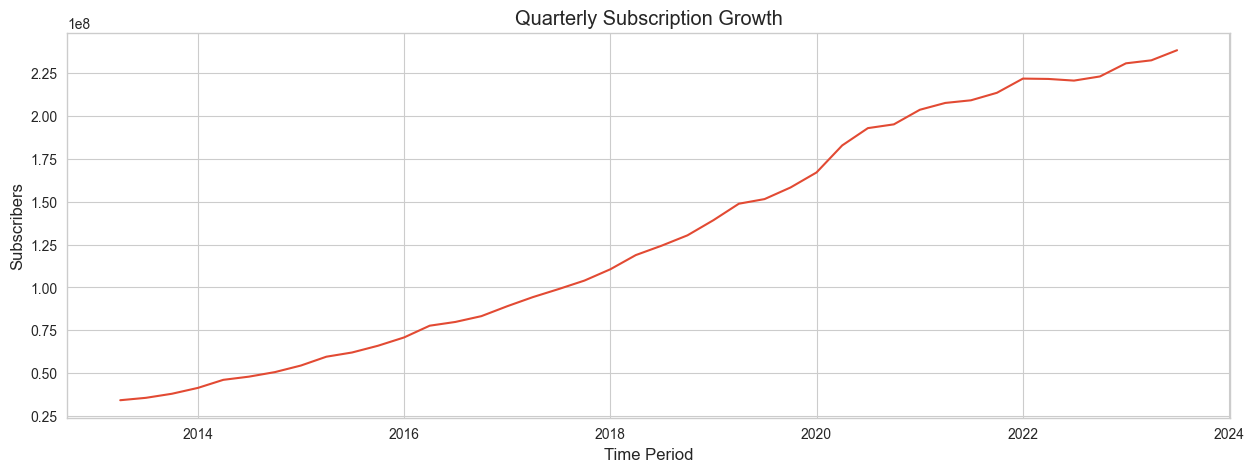

In [109]:
plt.figure( figsize = (15,5))

sns.lineplot(data = df, x = "Time Period", y = "Subscribers")
plt.title("Quarterly Subscription Growth")
plt.show()

In [110]:
# Quarterly Growth Rate

df["Quarterly Growth Rate"] = df["Subscribers"].pct_change()*100

In [111]:
df.head()

,Time Period,Subscribers,Quarterly Growth Rate
0,2013-04-01,34240000,NaN
1,2013-07-01,35640000,4.088785
2,2013-10-01,38010000,6.649832
3,2014-01-01,41430000,8.997632
4,2014-04-01,46130000,11.344436


In [112]:
# new column for bar color (green for positive growth, red for negative growth)

df['Bar Color'] = df['Quarterly Growth Rate'].apply(lambda x: 'green' if x > 0 else 'red')

In [113]:
df.fillna(0, inplace = True)
df.head()

,Time Period,Subscribers,Quarterly Growth Rate,Bar Color
0,2013-04-01,34240000,0.000000,red
1,2013-07-01,35640000,4.088785,green
2,2013-10-01,38010000,6.649832,green
3,2014-01-01,41430000,8.997632,green
4,2014-04-01,46130000,11.344436,green


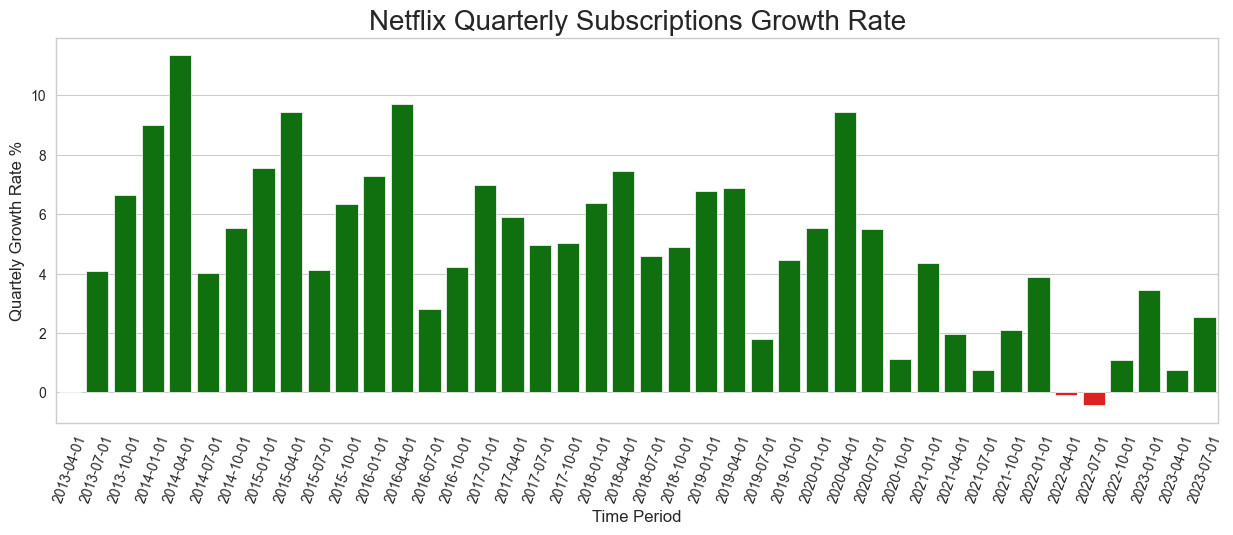

In [259]:
plt.figure( figsize = (15,5))

sns.barplot(data = df , 
            x = "Time Period",
            y = "Quarterly Growth Rate",
            palette = df["Bar Color"].tolist() )

plt.ylabel("Quartely Growth Rate %")
plt.title("Netflix Quarterly Subscriptions Growth Rate" , size = 20)
plt.xticks( rotation = 70)
plt.show()

In [116]:
# Extracting Year From Date Column
df['Year'] = df['Time Period'].dt.year

In [120]:
# Calculating the yearly growth rate
df["Yearly Growth"] = df['Subscribers'].pct_change().fillna(0)*100

In [129]:
# new column for bar color (green for positive growth, red for negative growth)
df["Y Bar Color"] = df["Yearly Growth"].apply(lambda x: 'green' if x >= 0 else 'red')

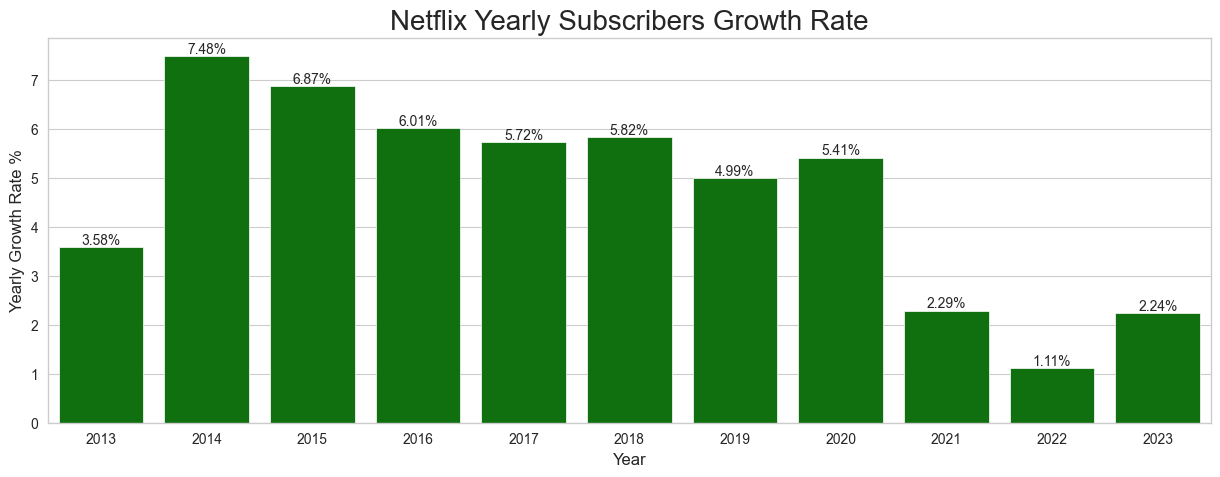

In [254]:
plt.figure( figsize = (15,5))

ax = sns.barplot( data = df ,
            x = "Year" ,
            y = "Yearly Growth" ,
            palette = df["Y Bar Color"].tolist() ,
            errorbar = None)

for i in ax.containers:
    ax.bar_label(i , fmt = "%1.2f%%")

plt.ylabel("Yearly Growth Rate %")
plt.title("Netflix Yearly Subscribers Growth Rate", size = 20)
plt.show()

# Let's Begin With Time Series Analysis

In [191]:
time_series = df.set_index("Time Period")["Subscribers"]

In [192]:
time_series.head()

Time Period
2013-04-01    34240000
2013-07-01    35640000
2013-10-01    38010000
2014-01-01    41430000
2014-04-01    46130000
Name: Subscribers, dtype: int64

# Decomposition

In [193]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decomp = seasonal_decompose( time_series , model = "additive", period = 4)

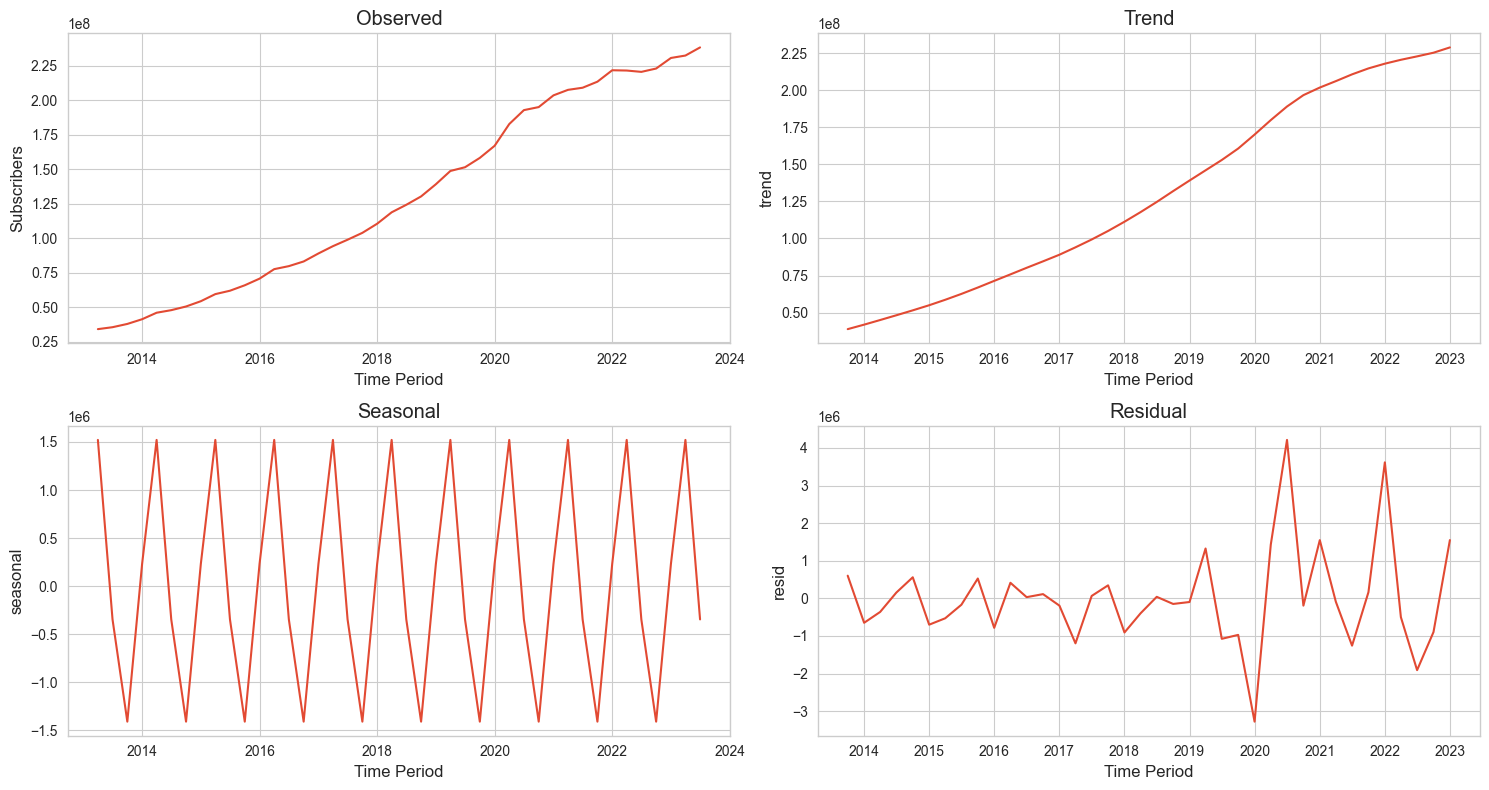

In [194]:
fig , ax  = plt.subplots(2,2, figsize = (15,8))

# Observed 
ax[0,0] = sns.lineplot( ts_decomp.observed , ax = ax[0,0])
ax[0, 0].set_title('Observed') 

# trend component 
sns.lineplot(data=ts_decomp.trend, ax=ax[0, 1]) 
ax[0, 1].set_title('Trend') 

# seasonal component 
sns.lineplot(data=ts_decomp.seasonal, ax=ax[1, 0]) 
ax[1, 0].set_title('Seasonal') 

# residual component 
sns.lineplot(data=ts_decomp.resid, ax=ax[1, 1]) 
ax[1, 1].set_title('Residual') 

plt.tight_layout() 
plt.show()

# Making Data Stationary

In [195]:
time_series.head()

Time Period
2013-04-01    34240000
2013-07-01    35640000
2013-10-01    38010000
2014-01-01    41430000
2014-04-01    46130000
Name: Subscribers, dtype: int64

In [196]:
# First-order differencing
diff_1 = time_series.diff().dropna()

In [197]:
# Second Order Differencing
diff_2 = differenced_series.diff().dropna()

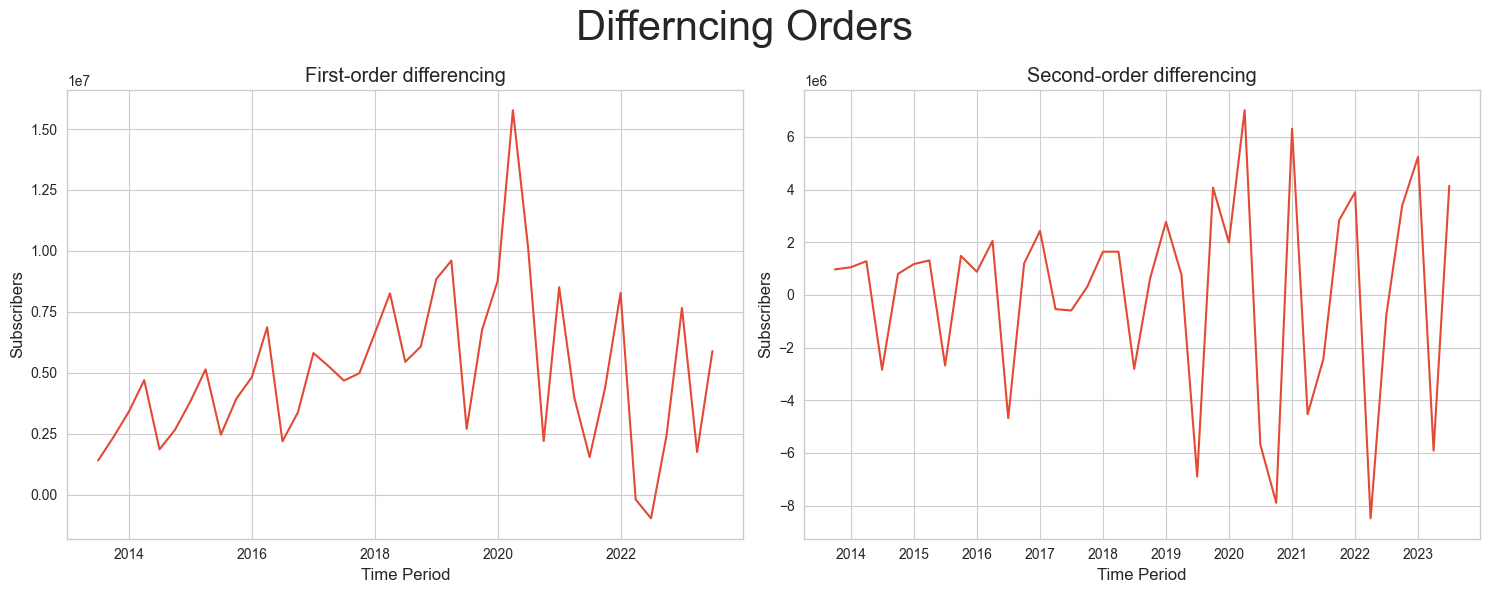

In [198]:
fig , ax = plt.subplots(1,2 , figsize = (15,6))

ax[0] = sns.lineplot(diff_1 , ax = ax[0])
ax[0].set_title("First-order differencing")

ax[1] = sns.lineplot(diff_2 , ax = ax[1])
ax[1].set_title("Second-order differencing")

fig.suptitle("Differncing Orders" , fontsize = 30)
plt.tight_layout()
plt.show()

### ADF Test For Differencing Order 1

In [199]:
from statsmodels.tsa.stattools import adfuller

# ADF test 
result = adfuller(diff_1)  

print('ADF Statistic:', result[0]) 
print('p-value:', result[1]) 
print('Critical Values:', result[4]) 

# Interpretation 
if result[1] < 0.05:
    print("The series is stationary") 
else: 
    print("The series is not stationary")

ADF Statistic: -4.523088428253381
p-value: 0.00017858926729786263
Critical Values: {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}
The series is stationary


### ADF Test For Differencing Order 2

In [200]:
# ADF test 
result = adfuller(diff_2)  

print('ADF Statistic:', result[0]) 
print('p-value:', result[1]) 
print('Critical Values:', result[4]) 

# Interpretation 
if result[1] < 0.05:
    print("The series is stationary") 
else: 
    print("The series is not stationary")

ADF Statistic: -6.853558367231555
p-value: 1.6704522896097093e-09
Critical Values: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}
The series is stationary


# Using ARIMA for Forecasting Netflix Quarterly Subscriptions

In [201]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

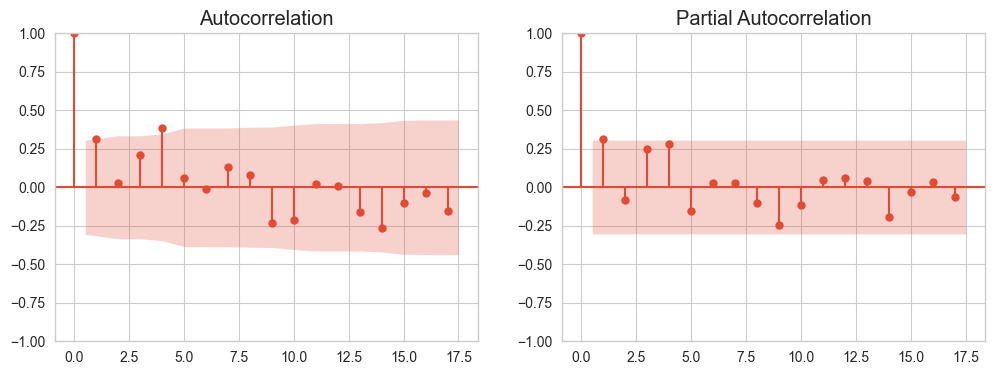

In [202]:
# ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(diff_1, ax=axes[0])
plot_pacf(diff_1, ax=axes[1])
plt.show()

In [237]:
p, d, q = 1, 1, 1
model = ARIMA(time_series, order=(p, d, q))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Fri, 15 Nov 2024   AIC                           1351.986
Time:                        03:48:26   BIC                           1357.127
Sample:                    04-01-2013   HQIC                          1353.858
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.760      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.0

C:\Users\areeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

C:\Users\areeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

C:\Users\areeb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



In [204]:
# make predictions using the trained model to forecast the number of subscribers for the next five quarters:

future_steps = 5
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
predictions = predictions.astype(int)
predictions

2023-10-01    243321446
2024-01-01    248251624
2024-04-01    253180534
2024-07-01    258108177
2024-10-01    263034551
Freq: QS-OCT, Name: predicted_mean, dtype: int32

## Netflix Subscriptions Forecasting for the next five quarters

In [205]:
# DataFrame with the original data and predictions

forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})
forecast.tail(6)

,Original,Predictions
2023-07-01,238390000.0,NaN
2023-10-01,NaN,243321446.0
2024-01-01,NaN,248251624.0
2024-04-01,NaN,253180534.0
2024-07-01,NaN,258108177.0
2024-10-01,NaN,263034551.0


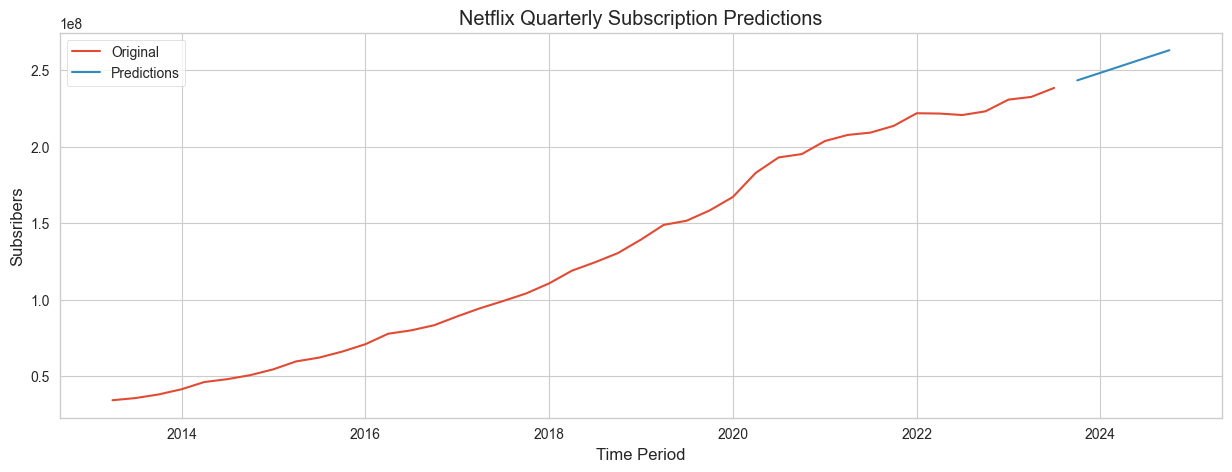

In [206]:
# Plotting the original data and predictions

name = ["Original", "Predictions"]
plt.figure( figsize = (15,5))
for i in forecast[name]:
    sns.lineplot( x = forecast.index , y = forecast[i], label = i)

plt.xlabel("Time Period")
plt.ylabel("Subsribers")
plt.title("Netflix Quarterly Subscription Predictions")
plt.show()

### Summary